# <b> Chapter 5

In [1]:
from time import perf_counter
from collections import Counter
from numbers import Number
from typing import List
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

random.seed(18)
np.random.seed(5)

In [2]:
# Defining basic util decorators

def time_it(times: int = 100):
    """Calculates processing time given times"""
    def outer(fn):
        def inner(*args, **kwargs):
            start = perf_counter()
            for _ in range(times):
                res = fn(*args, **kwargs)
            return res, f"Time elapsed: {(perf_counter() - start)/times}"
        return inner
    return outer


def _is_list(fn) -> TypeError | None:
    def inner(l, *args, **kwargs):
        """Checks if l is a list"""
        if all(list(map(lambda x: isinstance(x, Number), l))):
            return fn(l, *args, **kwargs)
        raise TypeError("Argument is not of type List.")
    return inner

## Describing a Single Set of Data

In [3]:
# Generating basic datasets

sample_size = 500


# List of people with random number of friends

num_friends = np.array([random.randint(0, 20)
                       for _ in range(sample_size)], dtype=np.int32)

# Daily hours spent on the website w/o tendency

dh_rand = np.array([random.random()*8 for _ in range(sample_size)])

# Daily hours spent on the website w/ tendency

clear = np.linspace(0, 8, sample_size)
dh_tend = clear + np.random.random(500)
dh_tend = np.clip(dh_tend, None, 8)

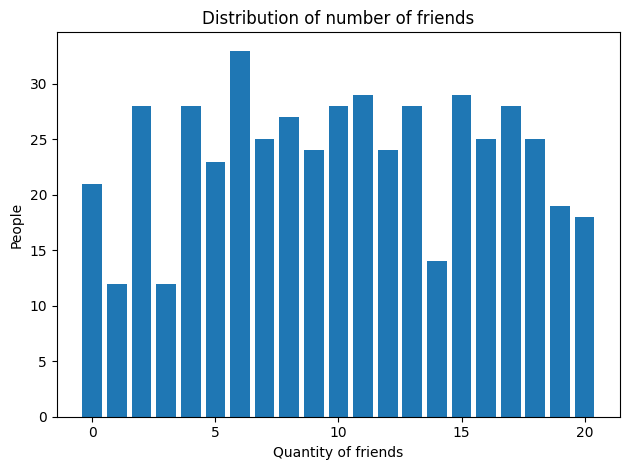

In [4]:
dist = Counter(num_friends)

fig, ax = plt.subplots(tight_layout=True)
ax.bar(dist.keys(), dist.values())
ax.set_ylabel('People')
ax.set_xlabel('Quantity of friends')
plt.title("Distribution of number of friends")
plt.show()

## Central Tendencies

In [5]:
# Defining basic statistics

@_is_list
def mean(l: List[Number]) -> Number:
    """Calculates the mean of a l"""
    return sum(l) / len(l)


@_is_list
def median(l: List[Number]) -> Number:
    """Calculates the median of a l"""
    l = sorted(l)
    def l_median(a, b): return (a + b) / 2
    if len(l) % 2 == 0:
        return l_median(l[int(len(l)/2)-1], l[(int(len(l)/2))])
    return l[int(len(l)/2)]


@_is_list
def quantile(l: List[Number], p: float) -> List[Number]:
    """Calculates the 'pth' percentile (decimal) value in l."""
    return sorted(l)[int(p * len(l))]


@_is_list
def mode(l: List[Number]) -> List[Number]:
    """Finds which are the most frequent terms from l"""
    c = Counter(l)
    elems = sorted(c.items(), key=lambda x: x[:][1], reverse=True)
    MAX = max(c.values())
    res = []
    for i in elems:
        if (i[1] == MAX):
            res.append(i[0])
        else:
            break
    if len(res) == 1:
        return res[0]
    return res

In [6]:
# Calculating the central tendencies of num_friends

print(f"{'='*7} Dataset Info {'='*7}\n\nMode: {mode(num_friends)}\nMean: {mean(num_friends)}\nMedian: {median(num_friends)}\n2nd quantile: {quantile(num_friends, 0.25)}\n3rd quantile: {quantile(num_friends, 0.75)}\n\n{'='*28}")

======= Dataset Info =======

Mode: 6
Mean: 10.13
Median: 10.0
2nd quantile: 6
3rd quantile: 15



## Dispersion

In [7]:
# Defining dispersion statistics

@_is_list
def data_range(l: List[Number]) -> Number:
    """Calculates the range of l"""
    return max(l) - min(l)


@_is_list
def dev_mean(l: List[Number]) -> List[Number]:
    """Calculates the deviation from the mean"""
    m = mean(l)
    return list(map(lambda x: x - m, l))


def variance(l: List[Number]) -> Number:
    """Calculates the variance of l"""
    assert len(l) >= 2, "Variance requires at least two elements in l"
    return sum(list(map(lambda x: x ** 2, dev_mean(l))))/(len(l) - 1)


def std_dev(l: List[Number]) -> Number:
    """Calculates the standard deviation of l"""
    return math.sqrt(variance(l))


def iqr(l: List[Number]) -> Number:
    """Calculates the interquartile range of l"""
    return quantile(l, 0.75) - quantile(l, 0.25)


def z_score(l: List[Number]) -> Number:
    """Calculates the z-score of l"""
    std = std_dev(l)
    med = median(l)
    return list(map(lambda x: (x - med)/std, l))

## Correlation

In [8]:
# Defining more statistics

def covariance(l: List[Number], t: List[Number]) -> Number:
    """Calculates covariance from samples l and t. It evaluates how the mean values of two random variables move together."""
    assert len(l) == len(t), "Lists must have same length"
    c = sum(
        list(map(lambda x: x[0] * x[1], zip(dev_mean(l), dev_mean(t))))) / (len(l) - 1)
    return c


def correlation(l: List[Number], t: List[Number]) -> Number:
    """Calculates correlation from samples l and t. It evaluates if there is dependency between two random variables."""
    std_xy = std_dev(l) * std_dev(t)
    if std_dev:
        return covariance(l, t) / std_xy

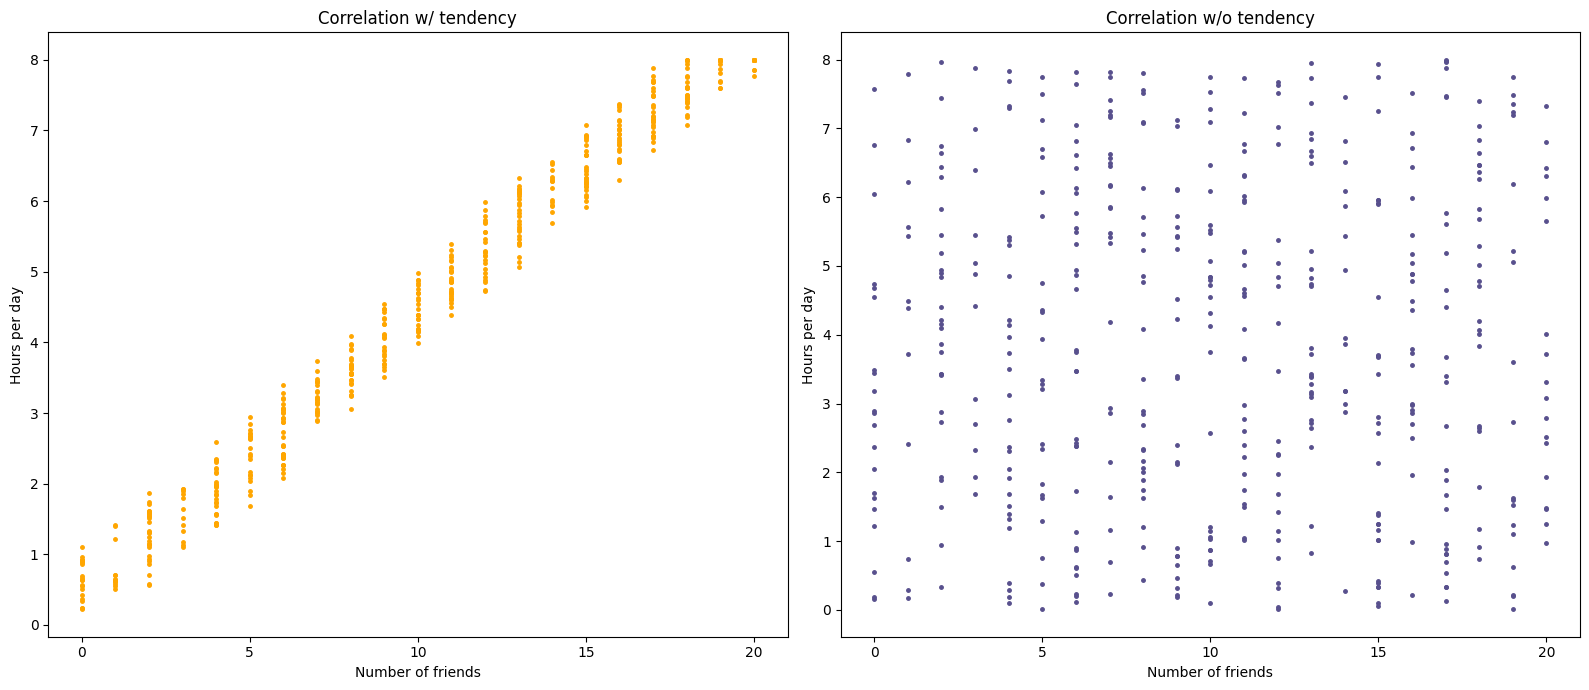

In [9]:
# Plotting correlation graph

fig, ax = plt.subplots(ncols=2, tight_layout=True)

fig.set_figwidth(16) 
fig.set_figheight(7) 
ax[0].locator_params(axis='x', integer=True)
ax[0].locator_params(axis='y', integer=True)
ax[1].locator_params(axis='x', integer=True)
ax[1].locator_params(axis='y', integer=True)

ax[0].set_title('Correlation w/ tendency')
ax[0].set_xlabel('Number of friends')
ax[0].set_ylabel('Hours per day')
ax[1].set_title('Correlation w/o tendency')
ax[1].set_xlabel('Number of friends')
ax[1].set_ylabel('Hours per day')
ax[0].plot(sorted(num_friends), dh_tend, marker='o', linewidth=0, ms=2.5, color='#ffa600')
ax[1].plot(num_friends, dh_rand, marker='o', linewidth=0, ms=2.5, color='#58508d')
plt.show()